#Digit handwriting recognition
In this problem, we want to build a model that can recognize a handwritten English number.

To carry out this project, MNIST the dataset related to Tensorflow and Keras library in python has been used.
##Import Library and load dataset


In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
import matplotlib.pyplot as plt

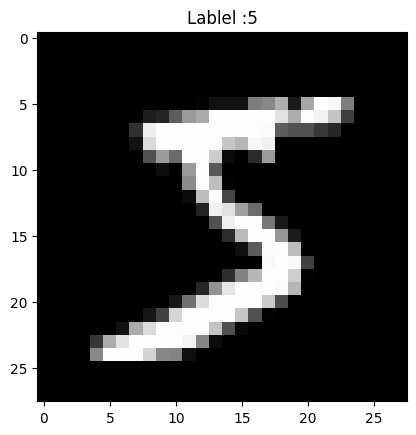

In [6]:
plt.imshow(x_train[0], cmap = 'gray')
plt.title(f"Lablel :{y_train[0]}")
plt.show()

##image normalization and convert labels to one-hot encoding
In this step, the images from the MNIST dataset, whose pixel values are from 0 to 255, are divided by 255 for normalization. This action converts pixel values from 0 to 255 to 0 to 1.

The to_categorical function from the Keras library in TensorFlow is used to convert labels to One-Hot Encoding format.

**One-Hot Encoding** is a technique for converting tags into a binary format that is commonly used for classification problems. In this method, each label is converted into a binary vector in which all elements are 0 except for one element that corresponds to the index of the label and its value is 1.

For example, if the label of an image is from 0 to 9, the to_categorical function converts this label into a binary vector with 10 elements, such that the value 1 is present at the position corresponding to the label, and the remaining elements are 0.

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

##create model
In this step, we used a model building algorithm called 'Sequential'. Sequential is a layer-by-layer model in Keras that simply adds layers sequentially.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

###train model

In [10]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2834 - accuracy: 0.9198 - val_loss: 0.1522 - val_accuracy: 0.9576
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1247 - accuracy: 0.9632 - val_loss: 0.1125 - val_accuracy: 0.9657
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0851 - accuracy: 0.9751 - val_loss: 0.0971 - val_accuracy: 0.9726
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0636 - accuracy: 0.9806 - val_loss: 0.0901 - val_accuracy: 0.9721
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0499 - accuracy: 0.9844 - val_loss: 0.0868 - val_accuracy: 0.9742
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0387 - accuracy: 0.9877 - val_loss: 0.0917 - val_accuracy: 0.9742
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0303 - accuracy: 0.9908 - val_loss: 0.0788 - val_accuracy:

###evaluation model

In [11]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss:{loss}, Test Accuracy: {accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0882 - accuracy: 0.9771
Test Loss:0.08817610889673233, Test Accuracy: 0.9771000146865845


###predication

In [ ]:
predictions = model.predict(x_test)

##show predication model

1/1 [==============================] - 0s 87ms/step


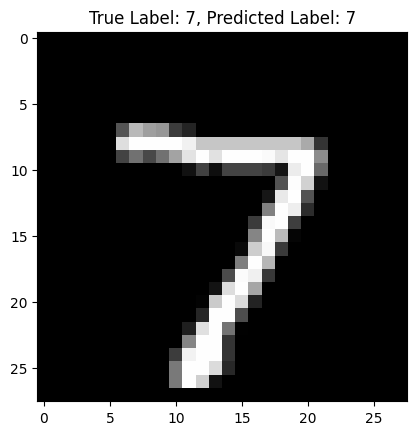

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# select a sample from test datas
index = 0
input_image = x_test[index].reshape(1, 28, 28)  #dimentional change
true_label = np.argmax(y_test[index])  # real label

# label prediction
predictions = model.predict(input_image)
predicted_label = np.argmax(predictions)

# show image
plt.imshow(input_image.reshape(28, 28), cmap='gray')
plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
plt.show()

##Is it possible to calculate AUC and ROC Curve for this problem?
In this project, which is a multi-class classification problem, AUC (area under the ROC curve) and ROC (performance characteristic curve) criteria are not directly applicable. These criteria are meaningful for binary classification problems.

In other words, if the number of classes is more than two (such as the problem of recognizing digits from 0 to 9, which has 10 classes), measures such as AUC and ROC are not suitable for directly evaluating the performance of the model.

To evaluate the model in multi-category problems, you can use criteria such as accuracy, confusion matrix, and precision, recall, f1-score. These criteria are based on the number of true and false associations of different categories with reality.

To calculate these metrics in TensorFlow and Keras, you can use functions like evaluate on the model, which is used in the evaluation section.

##Improve Model
If you want to improve the performance of the model, you can improve the performance of the model by changing the number of layers, adding Dropout and Batch Normalization, or using more complex neural networks.

Here are the changes applied:

1. Add a Dense layer with 256 neurons and Batch Normalization and Dropout with a probability of 0.5.
1. Add a Dense layer with 128 neurons and Batch Normalization and Dropout with a probability of 0.5.

Batch Normalization and Dropout are used as common techniques in deep neural networks to avoid overfitting and improve model performance. By applying these changes, I hope you will see an improvement in the performance of the model. You can experiment more freely with the model by making further changes and adding or subtracting layers.

In [13]:
from tensorflow.keras.layers import Dropout, BatchNormalization

# Create Improved Model
improved_model = Sequential()
improved_model.add(Flatten(input_shape=(28, 28)))

# Add Dense layer with Batch Normalization and Dropout with 256 neurons
improved_model.add(Dense(256, activation='relu'))
improved_model.add(BatchNormalization())
improved_model.add(Dropout(0.5))

# Add Dense layer with Batch Normalization and Dropout with 128 neurons
improved_model.add(Dense(128, activation='relu'))
improved_model.add(BatchNormalization())
improved_model.add(Dropout(0.5))

# Output layer
improved_model.add(Dense(10, activation='softmax'))

# Model Compile
improved_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train model
improved_model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 14s 8ms/step - loss: 0.4996 - accuracy: 0.8475 - val_loss: 0.1727 - val_accuracy: 0.9488
Epoch 2/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2936 - accuracy: 0.9110 - val_loss: 0.1335 - val_accuracy: 0.9605
Epoch 3/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2507 - accuracy: 0.9238 - val_loss: 0.1153 - val_accuracy: 0.9652
Epoch 4/15
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2229 - accuracy: 0.9342 - val_loss: 0.1045 - val_accuracy: 0.9679
Epoch 5/15
1500/1500 [==============================] - 13s 8ms/step - loss: 0.1978 - accuracy: 0.9404 - val_loss: 0.0989 - val_accuracy: 0.9697
Epoch 6/15
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1862 - accuracy: 0.9439 - val_loss: 0.0907 - val_accuracy: 0.9741
Epoch 7/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1716 - accuracy: 0.9493 - val_loss: 0.0874 - val_acc

In [15]:
# evaluate model
improved_loss, improved_accuracy = improved_model.evaluate(x_test, y_test)
print(f"Test improved Loss: {improved_loss}, Test improved Accuracy: {improved_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0665 - accuracy: 0.9794
Test improved Loss: 0.06653103977441788, Test improved Accuracy: 0.9793999791145325


1/1 [==============================] - 0s 21ms/step


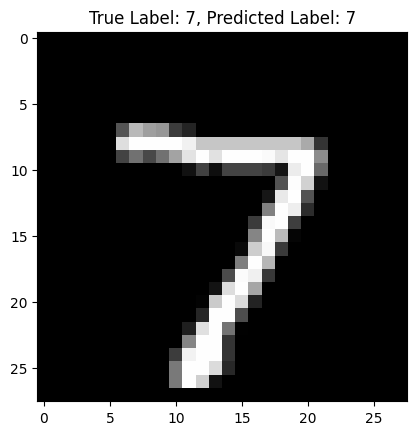

In [17]:
#prediction model
predictions = improved_model.predict(x_test)

# select a sample from test datas
index = 0
input_image = x_test[index].reshape(1, 28, 28)  #dimentional change
true_label = np.argmax(y_test[index])  # real label

# label prediction
predictions = improved_model.predict(input_image)
predicted_label = np.argmax(predictions)

# show image
plt.imshow(input_image.reshape(28, 28), cmap='gray')
plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
plt.show()